# Company_Sales_Data_Dashboard


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('2data.csv')

# total sale of each Product

In [73]:
df['Units_Sold'] = df['Units_Sold'].fillna(int(df['Units_Sold'].mean()))
df['Units_Sold'] = df['Units_Sold'].astype(int)

df['Unit_Price'] = df['Unit_Price'].fillna(df['Unit_Price'].mean())

total_sale_pdt = df.groupby('Product')['Units_Sold'].sum()
total_sale_pdt.to_csv('total_sale_pdt.csv')
total_sale_pdt

Product
Keyboard    302
Laptop       55
Monitor     207
Mouse       460
Printer     132
Name: Units_Sold, dtype: int64

## Region-wise sales

In [74]:
Region_sale = df.groupby('Region')['Units_Sold'].sum()
Region_sale.to_csv('Region_sale.csv')
Region_sale

Region
East     317
North    284
South    275
West     280
Name: Units_Sold, dtype: int64

# top saling Product

In [75]:
top = df.loc[df['Units_Sold'].idxmax()]
print("The name of the top saling product is: ",top['Product'])
best = f"The name of the top saling product is: ,{top['Product']}"
with open('best.txt','w') as file:
    file.write(best)

The name of the top saling product is:  Mouse


# monthly growth

In [79]:


df['Date'] = pd.to_datetime(df['Date'])

df['Units_Sold'] = df['Units_Sold'].fillna(round(df['Units_Sold'].mean())).astype(int)

df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Units_Sold'].sum()

monthly_growth = monthly_sales.pct_change().fillna(0) * 100
monthly_growth.to_csv('monthly_growth.csv')
monthly_growth


Month
2024-01      0.000000
2024-02    -78.378378
2024-03    380.000000
2024-04    -39.062500
2024-05    -68.376068
2024-06    467.567568
2024-07    -66.666667
2024-08     82.857143
2024-09     14.843750
2024-10    -79.591837
Freq: M, Name: Units_Sold, dtype: float64

# Bestsellers List

In [81]:

df['Total_Sales'] = df['Unit_Price'] * df['Units_Sold']
product_sales = df.groupby('Product')['Total_Sales'].sum().reset_index()

product_sales['Sales_Rank'] = product_sales['Total_Sales'].rank(ascending=False, method='dense')

product_sales = product_sales.sort_values('Sales_Rank')

product_sales.to_csv('Bestsellers_List.csv')
product_sales

,Product,Total_Sales,Sales_Rank
1,Laptop,3850000,1.0
2,Monitor,2484000,2.0
4,Printer,792000,3.0
3,Mouse,690000,4.0
0,Keyboard,604000,5.0


## Data visualisation

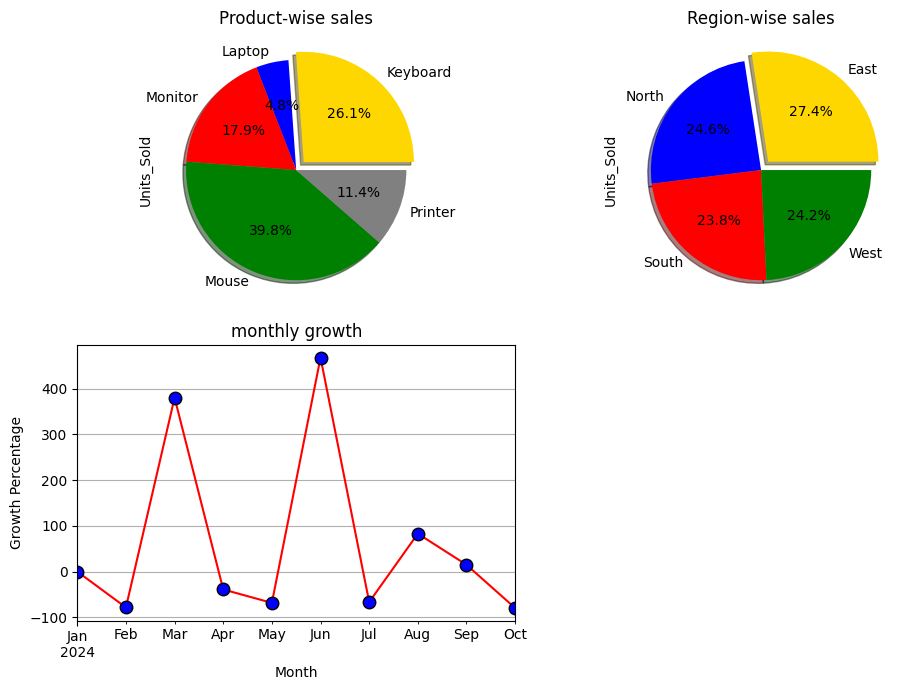

In [78]:
color1 = ['gold','blue','red','green','gray',]
ex1 = [0.1,0,0,0,0]
ex2 = [0.1,0,0,0]
color2 = ['gold','blue','red','green']
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
total_sale_pdt.plot(kind='pie',colors=color1,autopct="%1.1f%%",shadow=True,explode=ex1)
plt.title('Product-wise sales')


plt.subplot(2,2,2)
Region_sale.plot(kind='pie',colors=color2,autopct="%1.1f%%",shadow=True,explode=ex2)
plt.title('Region-wise sales')

plt.subplot(2,2,3)
monthly_growth.plot(kind='line',marker='o',color='red',markersize=9,markerfacecolor='blue',markeredgecolor='black')
plt.ylabel("Growth Percentage")
plt.title('monthly growth')
plt.grid(True)
plt.tight_layout()